# **Détection du Glaucome à l'aide du Transfer Learning**

## **Chargement des données:**

In [ ]:
import json
import math
import os
import cv2
import matplotlib.pyplot as plt
import scipy


In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"meryemdouider","key":"e6d4d9e76ba23b2dc984f747113db5ce"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download "sshikamaru/glaucoma-detection"

kaggle.json
glaucoma-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip glaucoma-detection.zip

Archive:  glaucoma-detection.zip
replace Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/001.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/002.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/003.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/004.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/005.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/006.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/007.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/008.jpg  
  inflating: Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/009.jpg  
  inflating: Fundus_Train_Val_Dat

## **Problématique :**


Il existe de nombreuses maladies de l’œil. Chaque partie anatomique de cet organe peut présenter un désordre et causer un trouble oculaire. Il est important pour le patient de bien comprendre la nature de son trouble oculaire afin de prendre bien soin de sa condition visuelle. Cela permet aussi de mieux prendre en charge une maladie et de dépister les signes indiquant une détérioration. Un patient informé et averti a plus de chances d’être traité à temps, de se sentir en confiance et d’observer son traitement.
Le glaucome est une maladie de l’œil qui touche de manière irréversible et permanente le nerf optique (atteinte structurelle). Le nerf optique est la partie de l’œil par où transite toute l’information visuelle captée par l’œil. Cette information voyage par le nerf optique et est transmise au cerveau.
**Glaucoma**
Le glaucome est une maladie très fréquente qui touche des gens de tous âges. Selon les sources, on estime qu’il y aurait jusqu’à 10 % de la population qui en serait atteinte. Au Canada, ce nombre représente 250 000 personnes. À l’échelle mondiale, ceci représente 65 millions d’individus.

Le glaucome peut se présenter sous diverses formes. On en dénombre pas moins d’une soixantaine. Nous présentons ci-dessous certaines formes les plus courantes .
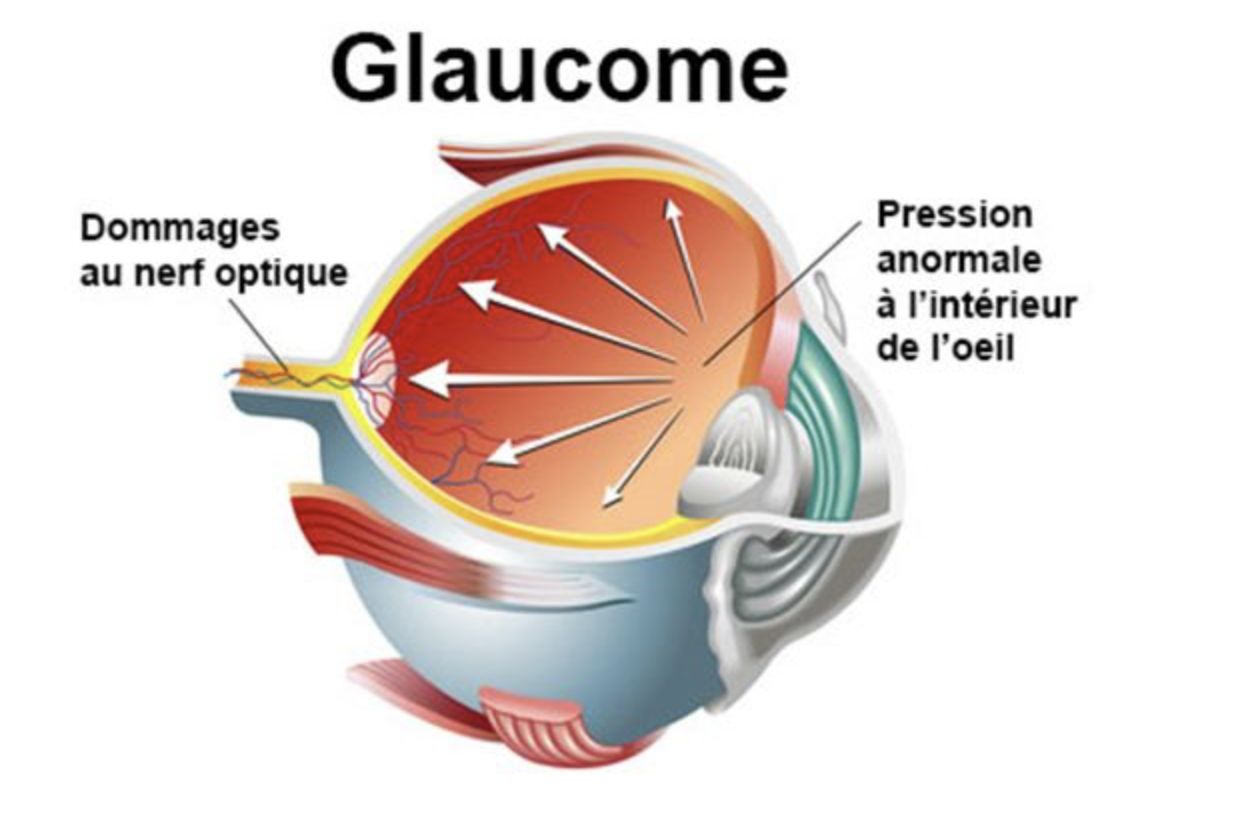

## **Présentation des données :**

In [ ]:
#Chargement de l'image:
image = Image.open('/content/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Positive/036.jpg')

In [ ]:
#Affichage des informations de l'image:
print(image.format)
print(image.mode)
print(image.size)

JPEG
RGB
(3072, 2048)


Affichage des images:

In [ ]:
def creation_data(Data, RESIZE, sigmaX=10):
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in tqdm(os.listdir(Data)):
        PATH = os.path.join(Data,IMAGE_NAME)
        _, ftype = os.path.splitext(PATH)
        if ftype == ".jpg":
            img = read(PATH)
            img = cv2.resize(img, (RESIZE,RESIZE))
           
            IMG.append(np.array(img))
    return IMG

In [ ]:
def affichage_images(data,etat):
    f, ax = plt.subplots(5,5, figsize=(15,15))
    for i in range(25):
        img_data = data[i]
        if etat  == 0: 
            str='Gluacoma_Negative'
        elif etat == 1: 
            str='Gluacoma_positive'
        ax[i//5, i%5].imshow(img_data)
        ax[i//5, i%5].axis('off')
        ax[i//5, i%5].set_title("état: {}".format(str))
    plt.show()

Affichage des images (Train_Gluacoma_Negative):

In [ ]:
T_Glaucoma_N = '/content/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative'

In [ ]:
Train_G_N = creation_data(T_Glaucoma_N ,224)

100%|██████████| 386/386 [00:34<00:00, 11.06it/s]


In [ ]:
##nombre des images avec un cas de Glaucoma_Negative (données train)
len(Train_G_N)

386

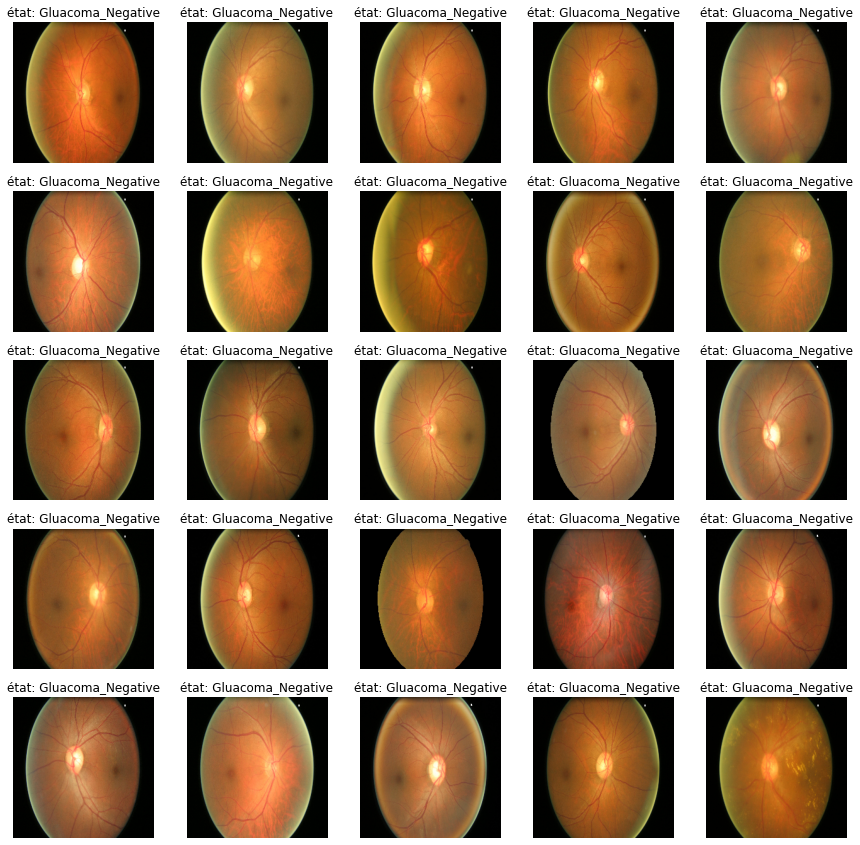

In [ ]:
affichage_images(Train_G_N,0)

Affichage des images (Train_Gluacoma_Positive):

In [ ]:
T_Glaucoma_P = '/content/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Positive'
Train_G_P = creation_data(T_Glaucoma_P ,224)

100%|██████████| 134/134 [00:12<00:00, 11.06it/s]


In [ ]:
##nombre des images avec un cas de Glaucoma_Positive (données train)
len(Train_G_P)

134

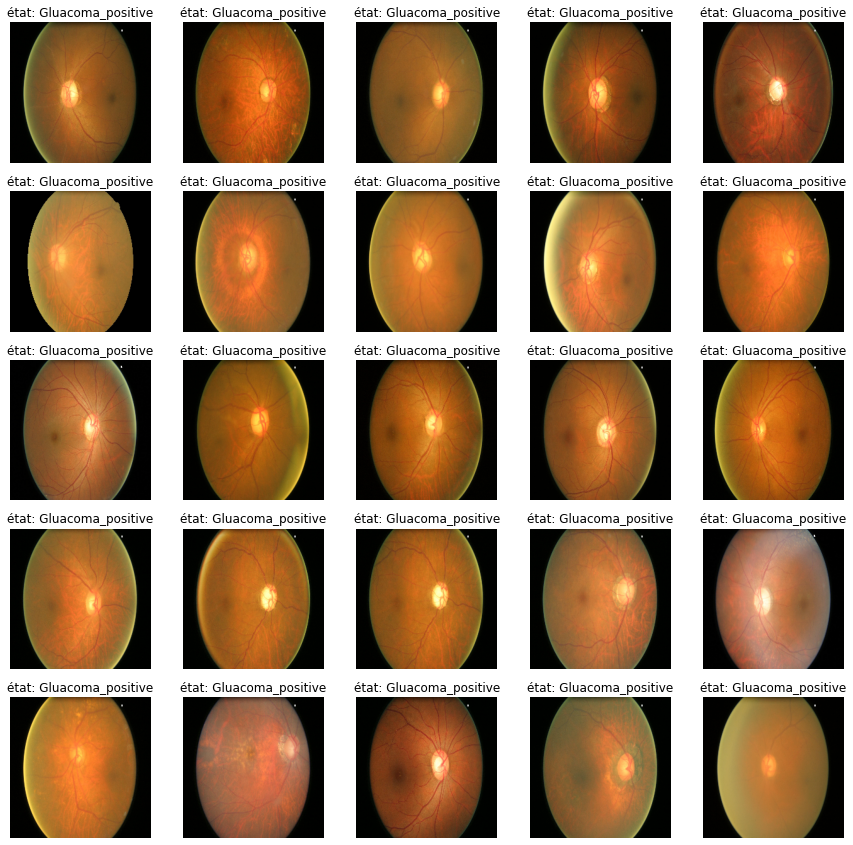

In [ ]:
affichage_images(Train_G_P,1)